In [13]:
import tensorflow as tf

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #直接显示图像

UsageError: unrecognized arguments: #直接显示图像


In [19]:
data = pd.read_csv('./Advertising.csv')

In [20]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


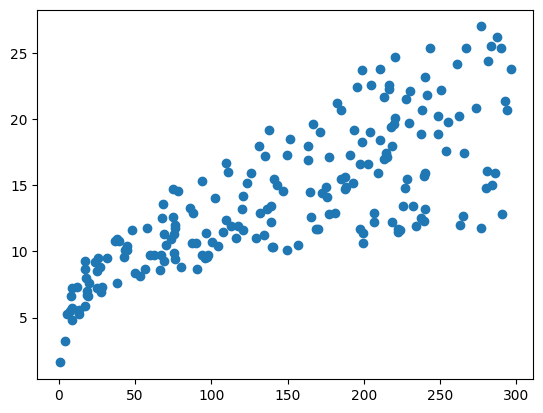

In [21]:
plt.scatter(data.TV,data.sales)

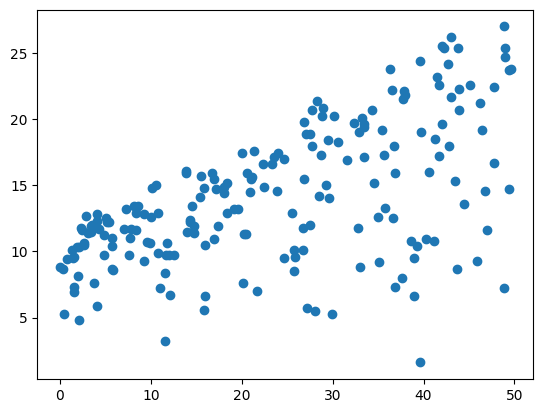

In [22]:
plt.scatter(data.radio,data.sales)

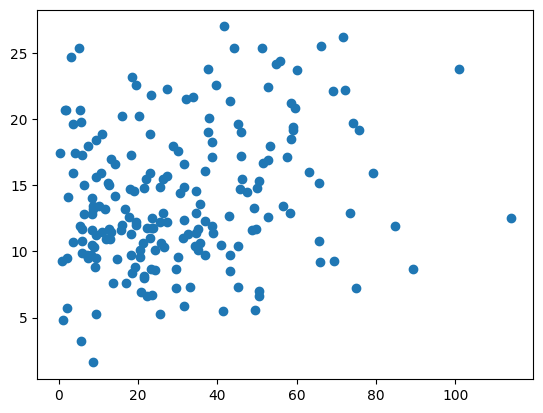

In [23]:
plt.scatter(data.newspaper,data.sales)

In [24]:
x = data. iloc[:, 1:-1]#取第二列开始到倒数第二列作为x
y = data. iloc[:, -1]#取最后一列作为y

In [25]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=(3,), activation='relu'),
                            tf.keras.layers.Dense(1)]
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
             loss='mse'
)

In [28]:
history = model.fit(x,y,epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 831us/step - loss: 4430.7080
Epoch 2/100
7/7 [==============================] - 0s 997us/step - loss: 3755.1335
Epoch 3/100
7/7 [==============================] - 0s 997us/step - loss: 3146.6653
Epoch 4/100
7/7 [==============================] - 0s 997us/step - loss: 2603.7764
Epoch 5/100
7/7 [==============================] - 0s 830us/step - loss: 2138.1709
Epoch 6/100
7/7 [==============================] - 0s 831us/step - loss: 1729.3208
Epoch 7/100
7/7 [==============================] - 0s 830us/step - loss: 1381.4303
Epoch 8/100
7/7 [==============================] - 0s 997us/step - loss: 1088.8715
Epoch 9/100
7/7 [==============================] - 0s 831us/step - loss: 855.9758
Epoch 10/100
7/7 [==============================] - 0s 997us/step - loss: 665.7859
Epoch 11/100
7/7 [==============================] - 0s 831us/step - loss: 510.9840
Epoch 12/100
7/7 [==============================] - 0s 831us/step - loss: 383.6308
Epoch

In [29]:
test = data.iloc[:10,1:-1]

In [30]:
model.predict(test)

1/1 [==============================] - 0s 47ms/step


array([[21.314316 ],
       [12.317953 ],
       [10.602075 ],
       [17.721622 ],
       [11.268861 ],
       [11.815307 ],
       [11.2372675],
       [11.711116 ],
       [ 1.2995254],
       [10.3615885]], dtype=float32)

In [31]:
test = data.iloc[:10,-1]

In [32]:
test

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [33]:
history.history.keys()

dict_keys(['loss'])

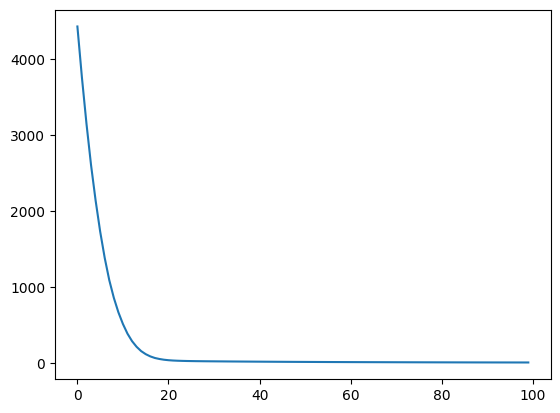

In [34]:
plt.plot(history.epoch,history.history.get('loss'))